In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import tree
import os
random_state = 42

In [2]:
# Read the csv file into a pandas DataFrame

crashes = pd.read_csv('/Users/mikeseifer/Desktop/Homework/Project 2/Temp_Traffic_challenge/US_Accidents_June20.csv')
#crashes = pd.read_csv('https://data-bootcamp-seifer.s3.us-east-2.amazonaws.com/US_Accidents_June20.csv')
crashes.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,False,False,False,False,True,False,Day,Day,Day,Day


In [224]:
crashes_df = crashes [["Severity","Temperature(F)","Visibility(mi)","Precipitation(in)","Wind_Speed(mph)"]]
crashes_df

,Severity,Temperature(F),Visibility(mi),Precipitation(in),Wind_Speed(mph)
0,3,36.9,10.0,0.02,NaN
1,2,37.9,10.0,0.00,NaN
2,2,36.0,10.0,NaN,3.5
3,3,35.1,9.0,NaN,4.6
4,2,36.0,6.0,NaN,3.5
...,...,...,...,...,...
3513612,2,86.0,10.0,0.00,13.0
3513613,2,70.0,10.0,0.00,6.0
3513614,2,73.0,10.0,0.00,10.0
3513615,2,71.0,10.0,0.00,8.0


In [225]:
# Use Pandas get_dummies to convert categorical data

### BEGIN SOLUTION
crashes_df = pd.get_dummies(crashes_df, columns=['Severity'])
crashes_df.head()
### END SOLUTION

,Temperature(F),Visibility(mi),Precipitation(in),Wind_Speed(mph),Severity_1,Severity_2,Severity_3,Severity_4
0,36.9,10.0,0.02,NaN,0,0,1,0
1,37.9,10.0,0.00,NaN,0,1,0,0
2,36.0,10.0,NaN,3.5,0,1,0,0
3,35.1,9.0,NaN,4.6,0,0,1,0
4,36.0,6.0,NaN,3.5,0,1,0,0


In [226]:
# Drop extra dummy columns

### BEGIN SOLUTION
crashes_df = crashes_df.drop(columns=['Severity_1','Severity_2','Severity_3'])
crashes_df.head()
### END SOLUTION

,Temperature(F),Visibility(mi),Precipitation(in),Wind_Speed(mph),Severity_4
0,36.9,10.0,0.02,NaN,0
1,37.9,10.0,0.00,NaN,0
2,36.0,10.0,NaN,3.5,0
3,35.1,9.0,NaN,4.6,0
4,36.0,6.0,NaN,3.5,0


In [227]:
crashes_df.dropna(inplace = True)
crashes_df.head()

,Temperature(F),Visibility(mi),Precipitation(in),Wind_Speed(mph),Severity_4
5,37.9,7.0,0.03,3.5,0
9,37.4,3.0,0.02,4.6,0
11,37.4,3.0,0.02,4.6,0
14,37.4,3.0,0.02,4.6,0
20,33.8,2.0,0.01,4.6,0


In [228]:
crashes_df.describe()

,Temperature(F),Visibility(mi),Precipitation(in),Wind_Speed(mph),Severity_4
count,1.438445e+06,1.438445e+06,1.438445e+06,1.438445e+06,1.438445e+06
mean,6.137838e+01,8.665723e+00,1.451276e-02,7.764041e+00,3.235855e-02
std,1.814067e+01,3.041024e+00,1.654038e-01,5.507036e+00,1.769506e-01
min,-8.900000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.000000e+01,9.000000e+00,0.000000e+00,4.600000e+00,0.000000e+00
50%,6.300000e+01,1.000000e+01,0.000000e+00,7.000000e+00,0.000000e+00
75%,7.500000e+01,1.000000e+01,0.000000e+00,1.040000e+01,0.000000e+00
max,1.150000e+02,1.050000e+02,2.500000e+01,9.840000e+02,1.000000e+00


In [229]:
# crashes_sample = crashes_df.sample(1000, replace=True, random_state=random_state)

In [230]:
# Assign X (data) and y (target)

### BEGIN SOLUTION
X = crashes_df[['Temperature(F)', 'Visibility(mi)','Precipitation(in)','Wind_Speed(mph)']]
y = crashes_df["Severity_4"].values.reshape(-1, 1)
print(X.shape, y.shape)
### END SOLUTION

(1438445, 4) (1438445, 1)


In [231]:
# Split the data into training and testing

### BEGIN SOLUTION
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
### END SOLUTION

In [232]:
target = crashes_df["Severity_4"]
target_names = ["Fender_Bender", "Moderate","Severe","Fatal"]

In [233]:
data = crashes_df.drop("Severity_4", axis=1)
feature_names = data.columns
data.head()

,Temperature(F),Visibility(mi),Precipitation(in),Wind_Speed(mph)
5,37.9,7.0,0.03,3.5
9,37.4,3.0,0.02,4.6
11,37.4,3.0,0.02,4.6
14,37.4,3.0,0.02,4.6
20,33.8,2.0,0.01,4.6


In [234]:
data.count()

Temperature(F)       1438445
Visibility(mi)       1438445
Precipitation(in)    1438445
Wind_Speed(mph)      1438445
dtype: int64

In [235]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [236]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.965315395481797

In [237]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.9671951992703247

In [238]:
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.3734632587419, 'Temperature(F)'),
 (0.2627074957563453, 'Wind_Speed(mph)'),
 (0.18657941662120986, 'Precipitation(in)'),
 (0.17724982888054489, 'Visibility(mi)')]

In [217]:
# from sklearn.svm import SVC 
# model = SVC(kernel='linear')
# model.fit(X_train, y_train)

In [239]:
# y_train

In [240]:
# y_test

In [244]:
# from sklearn.datasets import load_iris
# iris = load_iris()
# # estimator = model.estimators_[5]

In [258]:
# from sklearn.datasets import load_iris
# iris = load_iris()

# # Model (can also use single decision tree)
# from sklearn.ensemble import RandomForestClassifier
# model = RandomForestClassifier(n_estimators=10)

# # Train
# model.fit(iris.data, iris.target)
# # Extract single tree
# estimator = model.estimators_[5]

# from sklearn.tree import export_graphviz
# # Export as dot file
# export_graphviz(estimator, out_file='tree.dot', 
#                 feature_names = iris.feature_names,
#                 class_names = iris.target_names,
#                 rounded = True, proportion = False, 
#                 precision = 2, filled = True)

# # Convert to png using system command (requires Graphviz)
# from subprocess import call
# call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# # Display in jupyter notebook
# from IPython.display import Image
# Image(filename = 'tree.png')

In [259]:
# Calculate classification report
from sklearn.metrics import classification_report
predictions = clf.predict(X_test)
print(classification_report(y_test, predictions,
                            target_names=target_names))

ValueError: Number of classes, 2, does not match size of target_names, 4. Try specifying the labels parameter

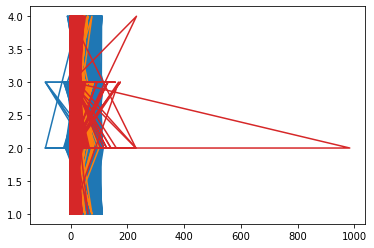

In [142]:
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 10000
plt.plot(X_train,y_train)

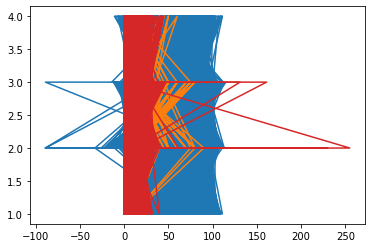

In [143]:
mpl.rcParams['agg.path.chunksize'] = 10000
plt.plot(X_test,y_test)

In [136]:
# Calculate classification report
from sklearn.metrics import classification_report
predictions = rf.predict(X_test)
print(classification_report(y_test, predictions,
                            target_names=target_names))

               precision    recall  f1-score   support

Fender_Bender       0.36      0.02      0.03      6504
     Moderate       0.71      0.95      0.82    252281
       Severe       0.44      0.10      0.16     89200
        Fatal       0.38      0.04      0.08     11627

     accuracy                           0.70    359612
    macro avg       0.47      0.28      0.27    359612
 weighted avg       0.63      0.70      0.62    359612

